In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
from sklearn.linear_model import LinearRegression, HuberRegressor

In [2]:
def plot_data_and_prediction(x, y, x_test, m_true, t_true, y_true, m_pred=None, t_pred=None, y_pred=None):
    plt.xlabel("x")
    plt.ylabel("y")
    plt.plot(x, y, "x", label="Data points")
    plt.plot(x_test, y_true, label=f"True: {m_true}x+{t_true}")
    if y_pred is not None:
        plt.plot(x_test, y_pred, label=f"Fit: {m_pred:.2f}x+{t_pred:.2f}")
    plt.legend()

# Data: m * x + t + noise

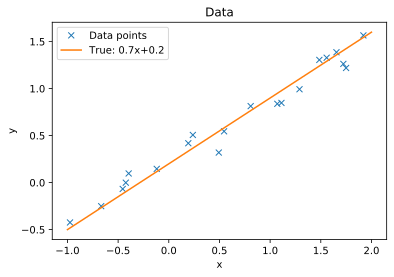

In [3]:
t = 0.2
m = 0.7
noise_std = 0.1

# Evaluate the true model at the edges
x_test = np.array([[-1], [2]])
y_test_true = m * x_test + t

n = 20
np.random.seed(537)
# samples x positions uniformly
x = np.random.rand(n) * 3 - 1
# sample noise from Gaussian
noise = noise_std * np.random.randn(n)
y = m * x + t + noise

plt.title("Data")
plot_data_and_prediction(x, y, x_test, m, t, y_test_true)

# Linear model

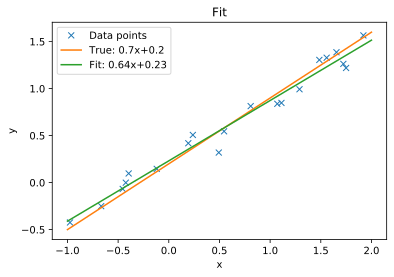

In [4]:
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)

plt.title("Fit")
y_test = model.predict(x_test)
plot_data_and_prediction(x, y, x_test, m, t, y_test_true,
                         model.coef_[0], model.intercept_, y_test)

# Corrupt data

Add one datapoint which is an outlier

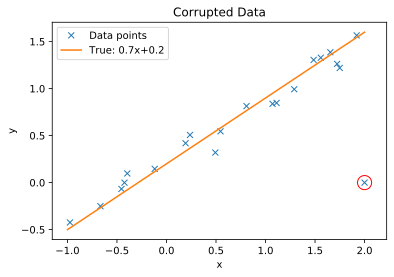

In [5]:
x_corrupt = np.concatenate((x, [2.0]))
y_corrupt = np.concatenate((y, [0.0]))

plt.title("Corrupted Data")
plot_data_and_prediction(x_corrupt, y_corrupt, x_test, m, t, y_test_true)
plt.scatter(x_corrupt[-1], y_corrupt[-1], s=200, linewidth=1, facecolors='none', edgecolors="r")

Fit a linear function to the data: It is heavily corrupted by the corrupt data point

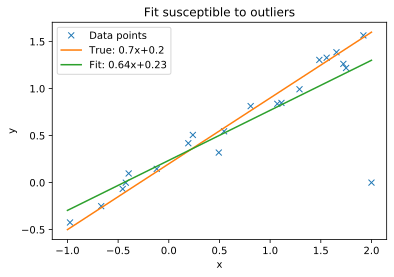

In [6]:
corrupt_model = LinearRegression()
corrupt_model.fit(x_corrupt.reshape(-1, 1), y_corrupt)

plt.title("Fit susceptible to outliers")
y_corrupt_test = corrupt_model.predict(x_test)
plot_data_and_prediction(x_corrupt, y_corrupt, x_test, m, t, y_test_true,
                         model.coef_[0], model.intercept_, y_corrupt_test)

## Change the loss to Huber loss

This loss is less susceptible to outliers

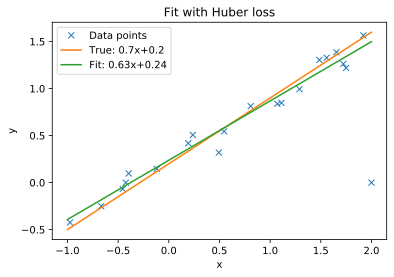

In [7]:
huber_model = HuberRegressor()
huber_model.fit(x_corrupt.reshape(-1, 1), y_corrupt)

plt.title("Fit with Huber loss")
y_huber_test = huber_model.predict(x_test)
plot_data_and_prediction(x_corrupt, y_corrupt, x_test, m, t, y_test_true,
                         huber_model.coef_[0], huber_model.intercept_, y_huber_test)